In [ ]:
import random

# 1. Gera a lista com 50 números aleatórios
numeros = [random.randint(1, 100) for _ in range(50)]

# 2. Calcula a média
media = sum(numeros) / len(numeros)

# 3. Define o intervalo (range)
limite_inferior = media - 3
limite_superior = media + 3

# 4. Filtra os números que estão dentro desse intervalo [-3, 3]
numeros_no_range = [n for n in numeros if limite_inferior <= n <= limite_superior]

# Resultados
print(f"Lista completa: {numeros}")
print(f"\n--- Análise de Proximidade ---")
print(f"Média calculada: {media:.2f}")
print(f"Intervalo de busca: [{limite_inferior:.2f} até {limite_superior:.2f}]")

# Ordenamos apenas para facilitar a leitura do usuário
numeros_no_range.sort()

if numeros_no_range:
    print(f"Números encontrados no range: {numeros_no_range}")
    print(f"Total de números encontrados: {len(numeros_no_range)}")
else:
    print("Nenhum número da lista caiu dentro do intervalo de [-3, 3] da média.")

Lista completa: [63, 71, 40, 60, 87, 12, 52, 13, 36, 75, 72, 33, 99, 8, 9, 46, 31, 25, 5, 97, 30, 76, 76, 93, 36, 5, 45, 68, 34, 96, 68, 14, 74, 4, 17, 82, 14, 71, 63, 27, 2, 13, 54, 71, 33, 14, 20, 7, 100, 89]

--- Análise de Proximidade ---
Média calculada: 46.60
Intervalo de busca: [43.60 até 49.60]
Números encontrados no range: [45, 46]
Total de números encontrados: 2


Melhor Rota: P -> A -> D -> C -> B -> P
Distância Total: 22 km


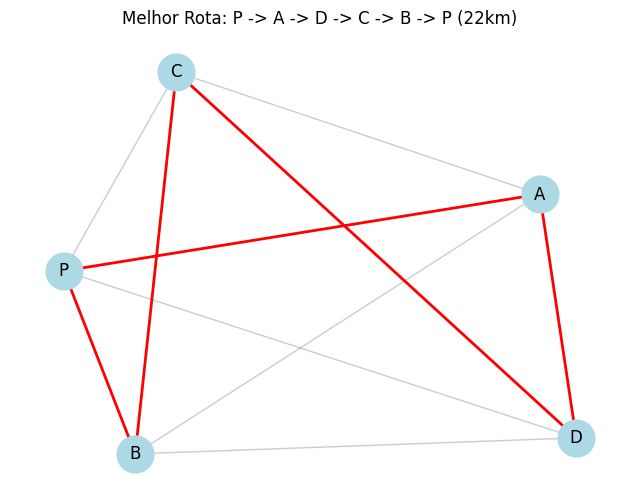

In [ ]:
import itertools
import matplotlib.pyplot as plt
import networkx as nx

# 1. Definição das distâncias (Matriz de Adjacência)
# Ordem dos índices: 0:P, 1:A, 2:B, 3:C, 4:D
distancias = {
    ('P', 'A'): 5, ('P', 'B'): 8, ('P', 'C'): 10, ('P', 'D'): 7,
    ('A', 'B'): 6, ('A', 'C'): 9, ('A', 'D'): 4,
    ('B', 'C'): 3, ('B', 'D'): 5,
    ('C', 'D'): 2
}

# Completar o dicionário para ser bidirecional (A-B é o mesmo que B-A)
for (origem, destino), valor in list(distancias.items()):
    distancias[(destino, origem)] = valor

clientes = ['A', 'B', 'C', 'D']
ponto_partida = 'P'

# 2. Calcular todas as rotas possíveis
menor_distancia = float('inf')
melhor_rota = None

for permutacao in itertools.permutations(clientes):
    # Montar a rota: P -> Cliente1 -> Cliente2 -> Cliente3 -> Cliente4 -> P
    rota_atual = (ponto_partida,) + permutacao + (ponto_partida,)

    # Calcular distância total da rota
    distancia_total = 0
    for i in range(len(rota_atual) - 1):
        distancia_total += distancias[(rota_atual[i], rota_atual[i+1])]

    # Verificar se é a menor encontrada
    if distancia_total < menor_distancia:
        menor_distancia = distancia_total
        melhor_rota = rota_atual

print(f"Melhor Rota: {' -> '.join(melhor_rota)}")
print(f"Distância Total: {menor_distancia} km")

# 3. Visualização Gráfica
G = nx.Graph()
for (u, v), d in distancias.items():
    G.add_edge(u, v, weight=d)

pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(8, 6))

# Desenhar todos os nós e arestas suavemente
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, alpha=0.2)

# Destacar a melhor rota
arestas_melhor_rota = [(melhor_rota[i], melhor_rota[i+1]) for i in range(len(melhor_rota)-1)]
nx.draw_networkx_edges(G, pos, edgelist=arestas_melhor_rota, edge_color='red', width=2)

plt.title(f"Melhor Rota: {' -> '.join(melhor_rota)} ({menor_distancia}km)")
plt.axis('off')
plt.show()

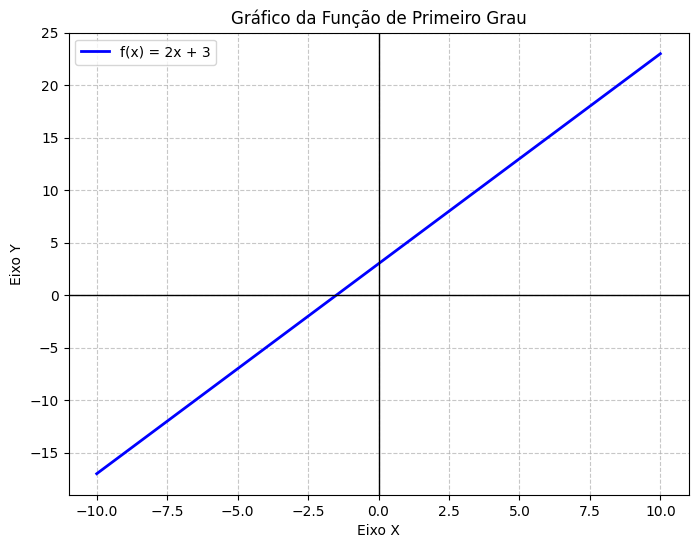

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def plotar_funcao_primeiro_grau(a, b):
    # 1. Definir o intervalo de x (de -10 a 10)
    x = np.linspace(-10, 10, 100)

    # 2. Calcular os valores de y com base na fórmula
    y = a * x + b

    # 3. Configurar a figura e o gráfico
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label=f'f(x) = {a}x + {b}', color='blue', linewidth=2)

    # 4. Desenhar os eixos do Plano Cartesiano (x=0 e y=0)
    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)

    # 5. Estilização do gráfico
    plt.title('Gráfico da Função de Primeiro Grau')
    plt.xlabel('Eixo X')
    plt.ylabel('Eixo Y')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()

    # 6. Exibir o gráfico
    plt.show()

# Exemplo de uso: f(x) = 2x + 3
plotar_funcao_primeiro_grau(a=2, b=3)